In [1]:
from google.colab import drive
# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization

In [4]:
df = pd.read_csv("/content/drive/My Drive/ColabNotebooks/MachineLearning/RandomForest/RandomForestClassification/car_evaluation.csv")

In [5]:
df.shape

(1727, 7)

In [6]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [7]:
df.columns

Index(['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc'], dtype='object')

#Rename column names

In [8]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [9]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


# Frequency distribution of values in variables

In [10]:
#df['buying'].unique()

In [11]:
#df['maint'].unique()

In [12]:
#df['doors'].unique()

In [13]:
#df['persons'].unique()

In [14]:
#df['lug_boot'].unique()

In [15]:
#df['safety'].unique()

In [16]:
#df['class'].unique()

In [17]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
for col in col_names:
    print(df[col].value_counts())   

high     432
med      432
low      432
vhigh    431
Name: buying, dtype: int64
high     432
med      432
low      432
vhigh    431
Name: maint, dtype: int64
3        432
4        432
5more    432
2        431
Name: doors, dtype: int64
4       576
more    576
2       575
Name: persons, dtype: int64
med      576
big      576
small    575
Name: lug_boot, dtype: int64
med     576
high    576
low     575
Name: safety, dtype: int64
unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [19]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [20]:
df.describe().T

,count,unique,top,freq
buying,1727,4,high,432
maint,1727,4,high,432
doors,1727,4,3,432
persons,1727,3,4,576
lug_boot,1727,3,med,576
safety,1727,3,med,576
class,1727,4,unacc,1209


#Missing values in variables

In [21]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [22]:
df.duplicated().sum()

0

# Label Encoding

In [23]:
from sklearn.preprocessing import LabelEncoder
labelencoder =  LabelEncoder() 
df['buying']=labelencoder.fit_transform(df['buying'])
df['buying'].unique()

array([3, 0, 2, 1])

In [24]:
from sklearn.preprocessing import LabelEncoder
labelencoder =  LabelEncoder() 
df['maint']=labelencoder.fit_transform(df['maint'])
df['maint'].unique()

array([3, 0, 2, 1])

In [25]:
from sklearn.preprocessing import LabelEncoder
labelencoder =  LabelEncoder() 
df['doors']=labelencoder.fit_transform(df['doors'])
df['doors'].unique()

array([0, 1, 2, 3])

In [26]:
from sklearn.preprocessing import LabelEncoder
labelencoder =  LabelEncoder() 
df['persons']=labelencoder.fit_transform(df['persons'])
df['persons'].unique()

array([0, 1, 2])

In [27]:
from sklearn.preprocessing import LabelEncoder
labelencoder =  LabelEncoder() 
df['lug_boot']=labelencoder.fit_transform(df['lug_boot'])
df['lug_boot'].unique()

array([2, 1, 0])

In [28]:
from sklearn.preprocessing import LabelEncoder
labelencoder =  LabelEncoder() 
df['safety']=labelencoder.fit_transform(df['safety'])
df['safety'].unique()

array([2, 0, 1])

In [29]:
from sklearn.preprocessing import LabelEncoder
labelencoder =  LabelEncoder() 
df['class']=labelencoder.fit_transform(df['class'])
df['class'].unique()

array([2, 0, 3, 1])

In [30]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2


#Declare feature vector and target variable

In [31]:
X = df.drop(['class'], axis=1)
y = df['class']

#Feature Engineering

In [32]:
# split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [33]:
X_train.shape, X_test.shape

((1157, 6), (570, 6))

 # Random Forest Classifier model with default parameters 

In [34]:
from sklearn.ensemble import RandomForestClassifier
# instantiate the classifier 
rfc = RandomForestClassifier(random_state=0)
# fit the model
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [35]:
y_pred = rfc.predict(X_train)

In [38]:
y_pred.shape

(1157,)

In [39]:
accuracy = rfc.score(X_train,y_pred)

In [40]:
accuracy

1.0

In [41]:
y_pred = rfc.predict(X_test)

In [42]:
y_pred.shape

(570,)

In [43]:
accuracy = rfc.score(X_test,y_pred)

In [44]:
accuracy

1.0

In [46]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9579


# Random Forest Regressor model with default parameters

In [47]:
from sklearn.ensemble import RandomForestRegressor

RandomForest_model=RandomForestRegressor(n_estimators=200,max_depth=10)
RandomForest_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, n_estimators=200)

In [48]:
predict_train=RandomForest_model.predict(X_train) 
predict_train.shape

(1157,)

In [49]:
accuracy=RandomForest_model.score(X_train,predict_train)
accuracy

1.0

In [50]:
predict_test=RandomForest_model.predict(X_test)
predict_test.shape

(570,)

In [51]:
accuracy=RandomForest_model.score(X_test,predict_test)
accuracy

1.0

In [52]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9579


# Random Forest Classifier model with parameter n_estimators=100

In [53]:
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)
# fit the model to the training set
rfc_100.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [54]:
# Predict on the test set results
y_pred_100 = rfc_100.predict(X_test)
# Check accuracy score 
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.9579


# Find important features with Random Forest model

In [55]:
# create the classifier with n_estimators = 100
clf = RandomForestClassifier(n_estimators=100, random_state=0)
# fit the model to the training set
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [56]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

safety      0.260855
persons     0.223864
buying      0.197485
maint       0.159773
lug_boot    0.088958
doors       0.069065
dtype: float64

# Visualize feature scores of the features

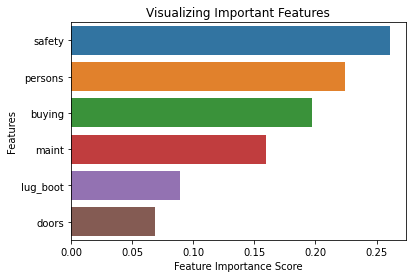

In [57]:
# Creating a seaborn bar plot
sns.barplot(x=feature_scores, y=feature_scores.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
# Add title to the graph
plt.title("Visualizing Important Features")
# Visualize the graph
plt.show()

# Build Random Forest model on selected features.

In [64]:
X = df.drop(['class', 'doors'], axis=1)  # drop the doors column
y = df['class']

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [66]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [67]:
import category_encoders as ce

In [68]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [69]:
# instantiate the classifier with n_estimators = 100
clf = RandomForestClassifier(random_state=0)
# fit the model to the training set
clf.fit(X_train, y_train)
# Predict on the test set results
y_pred = clf.predict(X_test)
# Check accuracy score 
print('Model accuracy score with doors variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with doors variable removed : 0.9263


In [70]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[108   5  12   2]
 [  1  10   2   5]
 [ 10   0 389   0]
 [  4   1   0  21]]
